In [20]:
# import modules
import panel as pn
pn.extension('tabulator')
import pandas as pd
import numpy as np
from panel.template import FastListTemplate
from pathlib import Path
from yahoo_fin.stock_info import get_data
import datetime
from matplotlib.figure import Figure
from matplotlib import cm
%matplotlib inline
import hvplot.pandas
import holoviews as hv
from holoviews import opts

# import modules that help build tabs
import modules.helpers as helpers
import modules.HistoricalData as hst
import modules.MCTab as MCTab
import modules.intro as intro
import modules.profile as prf
import modules.algorithmic_functions as af
import modules.AlgoTab as at

import pandas_ta as ta
import yfinance as yf
import datetime

from sklearn.linear_model import LogisticRegression
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import seaborn as sns

from joblib import dump, load

In [99]:
from modules.MCForecastTools import MCSimulation
def prep_MC_data(ticker_data):

    # weight_list = weights['weight'].to_list()


    simulation = MCSimulation(
        portfolio_data = ticker_data,
        weights=[1.0],
        num_simulation = 200,
        num_trading_days =252*10
    )


    simulation.calc_cumulative_return()
    invested_amount = 100000
    simulation_plot = simulation.plot_simulation()
    distribution_plot = simulation.plot_distribution()
    summary = simulation.summarize_cumulative_return()
    ci_lower_ten_cumulative_return = round(summary[8]*invested_amount,2)
    ci_upper_ten_cumulative_return = round(summary[9]*invested_amount,2)
    text = f"""
            There is a 95% chance that the final portfolio value after 10 years will be within the range of ${ci_lower_ten_cumulative_return:,.2f} and ${ci_upper_ten_cumulative_return:,.2f} based upon an initial investment of ${invested_amount:,.2f}
            """
    # hvplot.save(simulation_plot, Path("./figures/test.png"))
    # distribution_plot.savefig(Path("./figures/test2.png"))
    return simulation_plot, distribution_plot, summary, text

In [100]:
df = pd.read_csv("./data/performance/performance_data_macd_aggressive.csv", infer_datetime_format=True, parse_dates=True, index_col="index")

In [101]:
df['type'] = 'aggressive'
df.set_index('type', append=True, inplace=True)
df = df.unstack()
df = df.reorder_levels([1,0], axis=1)
df.rename(columns = {'Portfolio Daily Returns':'daily_return'}, inplace = True)

In [108]:
df.head()

type        aggressive                                           \
                 close MACD_signal Position Entry/Exit Position   
index                                                             
2022-01-10  131.489505           0      350               350.0   
2022-01-11  133.128998           0      350                 0.0   
2022-01-12  133.885004           0      350                 0.0   
2022-01-13  130.567496           0      350                 0.0   
2022-01-14  131.578996           0      350                 0.0   

type                                                                       \
           Portfolio Holdings Portfolio Cash Portfolio Total daily_return   
index                                                                       
2022-01-10       46021.326718  103978.673282   150000.000000          NaN   
2022-01-11       46595.149264  103978.673282   150573.822546     0.003825   
2022-01-12       46859.751348  103978.673282   150838.424630     0.001757   
2022-01-13       45698.623772  103978.673282   149677.297053    -0.007698   
2022-01-14       46052.648664  103978.673282   150031.321945     0.002365   

type                                                        \
           Portfolio Cumulative Returns Base Daily Returns   
index                                                        
2022-01-10                          NaN                NaN   
2022-01-11                     0.003825           0.012469   
2022-01-12                     0.005589           0.005679   
2022-01-13                    -0.002151          -0.024779   
2022-01-14                     0.000209           0.007747   

type                                
           Base Cumulative Returns  
index                               
2022-01-10                     NaN  
2022-01-11                0.012469  
2022-01-12                0.018218  
2022-01-13               -0.007012  
2022-01-14                0.000681

In [109]:
simulation_plot, distribution_plot, summary, text = prep_MC_data(df)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


:NdOverlay   [Variable]
   :Curve   [index]   (value)
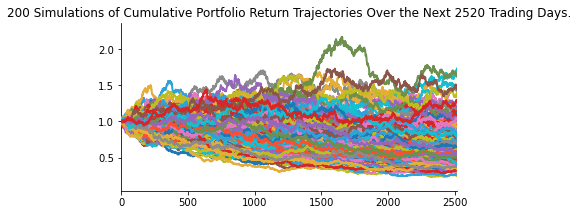

In [96]:
simulation_plot

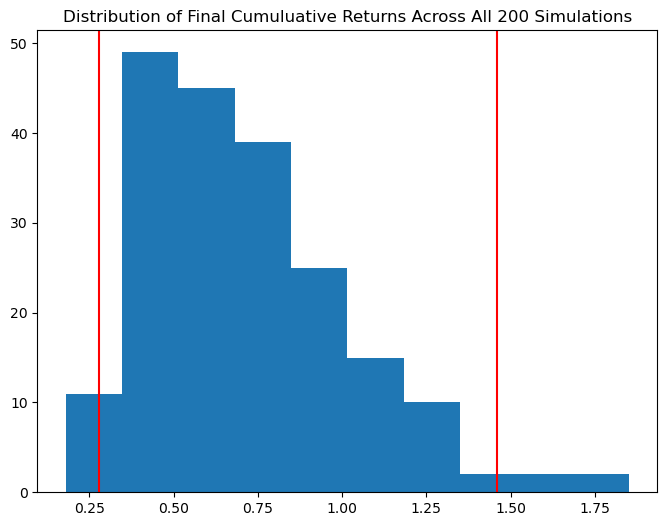

In [57]:
distribution_plot

In [115]:
summary

count           200.000000
mean              0.749789
std               0.215462
min               0.337520
25%               0.580373
50%               0.718858
75%               0.892257
max               1.462319
95% CI Lower      0.424465
95% CI Upper      1.150952
Name: 2520, dtype: float64

In [59]:
text

'\n            There is a 95% chance that the final portfolio value after 10 years will be within the range of $27,863.78 and $146,013.77 based upon an initial investment of $100,000.00\n            '

In [110]:
hvplot.save(simulation_plot, Path("./figures/test.png"))
distribution_plot.savefig(Path("./figures/test2.png"))

In [121]:
portfolios = ['conservative', 'balanced', 'growth', 'aggressive', 'alternative']
strategies = ['macd', 'ml', 'rsi', 'sma', 'stoch']

for p in portfolios:
    for s in strategies:
        df = pd.read_csv(Path(f"./data/performance/performance_data_{s}_{p}.csv"),infer_datetime_format=True, parse_dates=True, index_col="index")
        df['type'] = f"{p}"
        df.set_index('type', append=True, inplace=True)
        df = df.unstack()
        df = df.reorder_levels([1,0], axis=1)
        df.rename(columns = {'Portfolio Daily Returns':'daily_return'}, inplace = True)
        simulation_plot, distribution_plot, summary, text = prep_MC_data(df)
        hvplot.save(simulation_plot, Path(f"./figures/simulation_{s}_{p}.png"))
        distribution_plot.savefig(Path(f"./figures/distribution_{s}_{p}.png"))
        items = [summary, text]
        dump(items, Path(f"./MCdata/mcItems_{s}_{p}.joblib"))

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simula

In [114]:
from joblib import dump, load

In [116]:
items = [summary, text]

In [117]:
items[0]

count           200.000000
mean              0.749789
std               0.215462
min               0.337520
25%               0.580373
50%               0.718858
75%               0.892257
max               1.462319
95% CI Lower      0.424465
95% CI Upper      1.150952
Name: 2520, dtype: float64

In [118]:
dump(items, "./items.joblib")

['./items.joblib']

'\n            There is a 95% chance that the final portfolio value after 10 years will be within the range of $42,446.49 and $115,095.24 based upon an initial investment of $100,000.00\n            '